In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("CT-06-Imageprocessing.ipynb")

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Bildverarbeitung (durch Listenmanipulation)

## 1 Representation von Bildern

Heute beschäftigen wir uns mit der Bildverarbeitung von Bildern im sog. RGB-Format.
Ein Bild wird dabei durch eine dreidimensionale Liste (oder dreidimensionales Array) repräsentiert.
Durch die folgenden drei Funktionen können Sie ein Bild aus einer Datei in eine Liste von Listen laden und wieder zurück speichern und anzeigen:

In [2]:
def load(filename):
    return matplotlib.pyplot.imread(filename).tolist()

def save(filename, image_as_list):
    matplotlib.image.imsave(filename, np.asarray(image_as_list))
    
def show(image):
    plt.imshow(image)

Lassen Sie uns unser Beispielbild laden

In [3]:
image = load('./astronaut.png')

und anzeigen

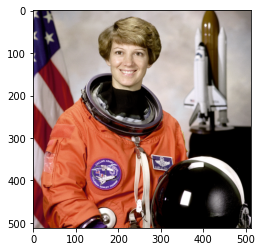

In [4]:
show(image)

Ein RGB-Bild besteht aus einer endlichen Folge von Pixeln welche in Spalten und Zeilen angeordnet sind.
Ein Pixel ``(y,x)`` in Zeile ``y`` und Spalte ``x`` besitzt die Farbe ``c = image[y][x]``.
Es ist üblich die Zeile vor der Spalte zu benennen, also ``y`` vor ``x``.

![Pixelbild](figs/pixelimagefloat.png)

Das oben abgebildet Bild hat $512$ Zeilen, $512$ Zeilen und $3$ Farbkanäle (Rot, Grün, Blau).
Es ist demnach ein 

$$512 \times 512 \times 3$$

RGB-Bild. 
Es besteht demnach aus $512 \cdot 512 = 262144$ Pixel mit $3$ Farbkanälen.

``image`` ist eine Liste von Listen von Listen von $3$ Fließkommazahlen.
Jede dieser Fließkommazahlen liegt zwischen 0.0 und 1.0.
Die erste Zahl gibt an wie rot, die zweite wie grün und die dritte wie blau ein Pixel ist.

Als erstes hätten wir gerne zwei Hilfsmethoden ``shape()`` und ``dim()``, welche uns Auskunft über unser vorliegendes Bild geben.

***
***Aufgabe 1.*** Schreiben Sie eine Funktion ``shape(image)`` die ein Tupel mit allen Listenlängen eines Bildes ``image`` zurückliefert. Zum Beispiel sollte 

```python
shape([])
```

``(0,)``

und

```python
shape([0,1,3])
```

``(3,)``

und  

```python
shape([[0,1,1],[3,1,1]])
```

``(2, 3)``

und

```python
shape([[[0,0,0], [1,1,0]], [[1,1,0], [2,3,3]]])
```

``(2, 2, 3)`` zurückgeben. Gehen Sie davon aus dass ``image`` eine Liste ist (wie oben beschrieben).

In [5]:
def shape(image):
    # BEGIN SOLUTION
    dim = 0
    shape = []
    rest = image
    while type(rest) == list:
        shape += [len(rest)]
        if len(rest) == 0:
            break
        rest = rest[0]
    return tuple(shape)
    # END SOLUTION

***Aufgabe 2.*** Schreiben Sie eine Funktion ``dim(image)`` die eine natürliche Zahl zurückgibt, welche die Dimension der Liste ``image`` beschreibt. Zum Beispiel sollte folgendes gelten:

```python
dim([[[0,0,0], [1,1,0]], [[1,1,0], [2,3,3]]]) == 3
dim([1,2,3]) == 1
dim([[0,0,0]]) == 2
dim([]) == 0
```

**Tipp:** Können Sie ``shape(image)`` einsetzten?

In [6]:
def dim(image):
    # BEGIN SOLUTION
    return len(shape(image))
    # END SOLUTION

***

In [7]:
print(f'type: {type(image)}')
print(f'dimensions: {dim(image)}')
print(f'shape: {shape(image)}')

type: <class 'list'>
dimensions: 3
shape: (512, 512, 3)


Diese Funktionen werden uns im weiteren Verlauf noch sehr nützlich sein.

## 2 Iteration durch alle Pixel

Viele Operationen in der Bildverarbeitung, wie etwa die Anpassung der Helligkeit, werden durchgeführt indem eine bestimmte Operation für **jeden** Pixel angewedet wird.
Da wir in ``Python`` die Möglichkeit haben eine Funktion als Argument einer anderen Funktion zu übergeben, können wir diese Iteration über alle Pixel mit einer einizigen Funktion abhaken.

***
***Aufgabe 3.*** Implementieren Sie die Funktion ``process_pixels(image, op)``. Diese soll jeden Pixel ``image[y][x]`` des Bildes ``image`` durch ``op(image, y, x)`` ersetzten. Dabei soll ein neues Bild entstehen und das alte ``image`` soll unverändert bleiben. Überlegen Sie sich einen geeigneten Standardwert für ``op``.

**Tipp:** Benötigen Sie eine flache oder tiefe Kopie? Hilft Ihnen ein Lambda-Ausdruck?

In [8]:
import copy

def process_pixels(image, op = lambda image, y, x: copy.deepcopy(image[y][x])):
    # BEGIN SOLUTION
    h, w, c = shape(image)
    image_copy = copy.deepcopy(image);
    for y in range(h):
        for x in range(w):
            image_copy[y][x] = op(image, y, x)
    return image_copy
    # END SOLUTION

***

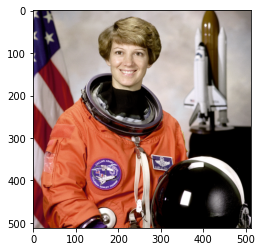

In [9]:
image_copy = process_pixels(image)
show(image_copy)

## 3 Graustufen

Sie kennen diese Funktion vermutlich von Ihrem Handy: Ein Bild in ein Schwarz-Weiß / Graustufen-Bild verwandeln.
Wir können das auch!

``to_gray(image)`` transformiert ein Bild in ein Graustufen-Bild indem alle drei Farbintensitäten (rot, grün, blau) gemittelt werden. Das heißt der neue Wert eines Pixels $I[x][y]$ an Position $x,y$ bekommt den 

$$I[y][x][i] \leftarrow \frac{r + g + b}{3},$$

wobei $r = I[y][x][0], g = I[y][x][1], b = I[y][x][2]$ und $i=0,1,2$ gilt.

***
***Aufgabe 4.*** Implementieren Sie die Funktion ``gray(image, y, x)``, sodass ``process_pixels(image, gray)`` ein Graustufenbild zurückliefert.

In [10]:
def gray(image, y, x):
    # BEGIN SOLUTION
    rgb = image[y][x]
    gray = sum(image[y][x]) / 3
    return [gray, gray, gray]
    # END SOLUTION

***

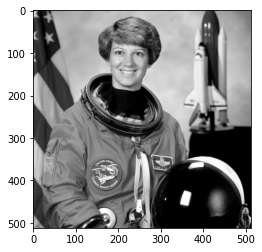

In [11]:
gray_image = process_pixels(image, gray)
show(gray_image)

## 4 Helligkeit

Wir können auch die Helligkeit eines Bildes sehr einfach duch folgende Transformation anpassen:

$$I[y][x] \leftarrow I[y][x] \cdot \gamma$$

wobei $\gamma > 1.0$ die Helligkeit erhöt und $\gamma < 1.0$ die Helligkeit verkleinert.

***
***Aufgabe 5.*** Implementieren Sie die Funktion ``gamma_op(gamma)``. Diese soll eine Funktion ``gamma_func(image, y, x)`` zurückliefern, welche die oben beschriebene Operation für jeden Pixel und das angegebene ``gamma`` durchführt.

``process_pixels(image, gamma_op(gamma))`` soll demnach die Helligkeit des gesamten bildes anpassen.

In [12]:
def gamma_op(gamma):
    # BEGIN SOLUTION
    def gamma_func(image, y, x):
        rgb = image[y][x]
        new_rgb = []
        for i in range(len(rgb)):
            new_rgb.append(max(0.0, min(1.0, image[y][x][i] * gamma)))
        return new_rgb
    return gamma_func
    # END SOLUTION

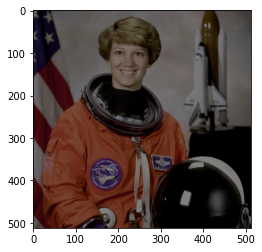

In [13]:
gamma = gamma_op(0.5)
image_gamma_reduced = process_pixels(image, gamma)
show(image_gamma_reduced)

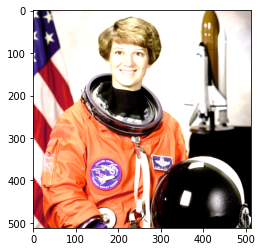

In [14]:
gamma = gamma_op(1.5)
image_gamma_increased = process_pixels(image, gamma)
show(image_gamma_increased)

Wir können auch mehrere Operationen kombinieren!

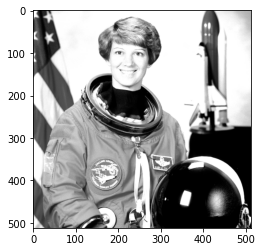

In [15]:
show(process_pixels(process_pixels(image, gamma_op(1.5)), gray))

## 5 Verwischen (Blur)

Beim Verwischen wird ein Bild unscharft, d.h. es verliert an Struktur. Man bezeichnet diesen Effekt auch als Diffusion / Streuung. Das Prinzip ist einfach: Man weise einem Pixel den Mittelwert des Farbwertes seiner Nachbarschafts Pixel zu. Dadurch werden die Pixel ähnlicher. Die Farben breiten sich wie die Wärmer einer Wärmequelle über ein Gebiet aus.

![Blur](figs/blur.png)

Je größer die Nachbarschaft, desto größer ist der Effekt.
Wir halten es einfach und betrachten nur die 8 Nachbarn und den Pixel selbst (d.h. 9 Pixel).
Somit gilt

$$I[y][x][i] \leftarrow \left( I[y+1][x][i] + I[y+1][x+1][i] + I[y+1][x-1][i] + I[y][x][i] + \ldots I[y-1][x-1][i] \right) / 9$$

***Aufgabe 6.*** Schreiben Sie eine Funktion ``blur_kernel(k=1)``, welche eine Funktion ``blur(image, y, x)`` zurückliefert, sodass ``process_pixels(image, blur)`` ein Bild verwischt. ``k`` soll darüber entscheiden wie weitreichend die Verwischung ist. Für ``k==1`` sind es 9 Nachbarn, für ``k==2`` 25 usw. Sie können auch nur den Fall ``k==1`` implementieren.

**Achtung** Am Rand des Bildes müssen Sie sich etwas einfallen lassen.

In [16]:
def blur_kernel(k=1):
    # BEGIN SOLUTION
    def blur(image, y, x):
        h, w, c = shape(image)
        rgb = image[y][x]
        new_rgb = []
        for channel in range(len(rgb)):
            val = 0
            div = 0
            for i in range(-k,k+1,1):
                for j in range(-k,k+1,1):
                    if y+i < h and x + j < w:
                        val += image[y+i][x+j][channel]
                        div += 1
            val = val / div
            new_rgb.append(val)
        return new_rgb
    return blur
    # END SOLUTION

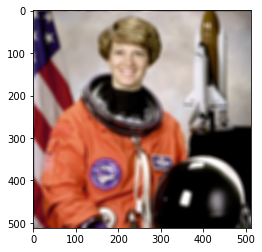

In [17]:
show(process_pixels(image, blur_kernel(5)))

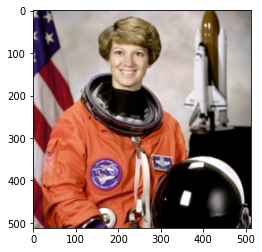

In [18]:
show(process_pixels(image, blur_kernel(1)))

Wenden wir das Verwischen mehrfach an, so verstärkt sich der Effekt:

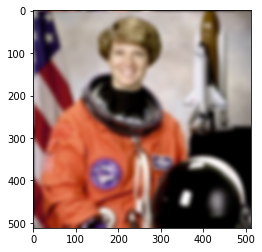

In [19]:
blur = blur_kernel(3)
show(process_pixels(process_pixels(image, blur), blur))

Die Umekehrung ist nicht ohne weiteres möglich!

## 6 Kantenerkennung

Das Erkennen von Objekten in einem Bild ist eine wichtige Anwendung der Bildverarbeitung.
Heute helfen uns Algorithmen aus dem maschinellen Lernen verschiedenste Objekte und Wesen auf Bildern zu erkennen.
Doch auch diese Algorithmen profitieren von einer vorgezogenen Bildtransformation, welche die Kanten eines Bildes verdeutlicht.

Eine Kante deutet oft daraufhin, dass sich an jener Stelle die Objekte unterscheiden.
Oben sehen wir einen rötlichen Raumanzug und einen schwarzen Helm.
Die Kante zwischen den beiden Objekten grenzt diese ab und ist durch den **Farbunterschied** definiert!

Für diesen Unterschied gibt es verschiedene Formeln.
Wir beschränken uns auf die einfachste und berechnen

$$I[y][x][i] \leftarrow \left( |I[y][x][i] - I[y+1][x][i]| + |I[y][x][i] - I[y][x+1][i]| \right) / 2 $$

***Aufgabe 7.*** Schreiben Sie eine Funktion ``diff(image, y, x)``, sodass ``process_pixels(image, diff)`` ein Bild erzeugt welches die obige Differenz ergibt und somit die Kanten hervorhebt.

**Achtung** Am Rand des Bildes müssen Sie sich etwas einfallen lassen.

In [20]:
def diff(image, y, x):
    # BEGIN SOLUTION
    h, w, c = shape(image)
    rgb = image[y][x]
    new_rgb = []
    div = 0
    for i in range(len(rgb)):
        if y+1 < h:
            val = abs(image[y][x][i] - image[y+1][x][i])
            div += 1
        if x+1 < w:    
            val = abs(image[y][x][i] - image[y][x+1][i])
            div += 1
        if div >= 1:
            val /= div
        else:
            val = image[y][x][i]
        new_rgb.append(val)
    return new_rgb
    # END SOLUTION

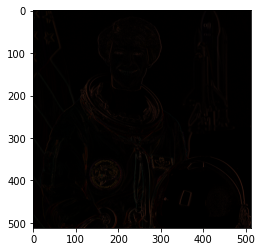

In [21]:
show(process_pixels(image, diff))

Das Ergebnis ist ein wenig dunkel.
Lassen Sie es uns doch ein wenig aufhellen:

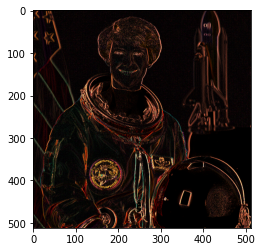

In [22]:
show(process_pixels(process_pixels(image, diff), gamma_op(8)))

Wir können auch die Farben herausnehmen:

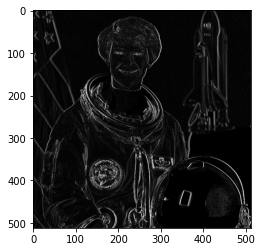

In [23]:
show(process_pixels(process_pixels(process_pixels(image, diff), gray), gamma_op(8)))

## 7 Ausschneiden

Wir möchten unsere Bilder natürlich auch zuschneiden können (engl. crop).
Angenommen unser Ursprungsbild hat $h$ Zeilen und $w$ Spalten so soll die Funktion ``crop(image, x0, y0, w0, h0)`` das Bild so zuschneiden, dass es bei Pixel $I[y_0][x_0]$ beginnt und bei $I[y_0+h_0-1][x_0+w_0-1]$ endet.

***Aufgabe 8.*** Implementieren Sie die Funktion ``crop(image, x0, y0, w0, h0)``. Falls wir zu viel wegschneiden, sollte dies ignoriert werden.

In [24]:
def crop(image, x0, y0, w0, h0):
    # BEGIN SOLUTION
    h, w, c = shape(image)
    image_copy = []
    for y in range(y0, min(y0+h0, h)):
        image_copy.append([])
        for x in range(x0, min(x0+w0, w)):
            image_copy[y-y0].append([])
            for i in range(c):
                image_copy[y-y0][x-x0].append(image[y][x][i])
    return image_copy
    # END SOLUTION

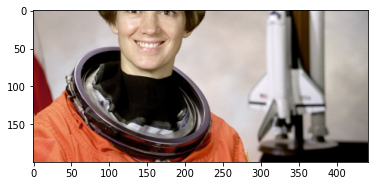

In [25]:
crop_image = crop(image, 70, 100, 500, 200)
plt.imshow(crop_image)

## 8 Rotation (um 90 Grad)

Als nächsten möchten wir die Möglichkeit erlangen unser Bild um 90 Grad gegen den Urzeigersinn zu rotieren!

***Aufgabe 9.*** Schreiben Sie eine Funktion ``rotate_ccw(image)``, welche ein neues Bild zurückliefert welches gleich dem Ursprungsbild ``image`` um 90 Grad gegen den Urzeigersinn (counterclockwise) gedreht ist. Schreiben Sie auf Grundlage dieser Funktion eine Funktion ``rotate(image, ccw=True)`` die entweder gegen den Urzeigersinn rotiert (``ccw==True`` oder im Urzeigersinn ``ccw==False``)'.

In [26]:
def rotate_ccw(image):
    # BEGIN SOLUTION
    def rotate_pixel(image, y, x):
        h, w, c = shape(image)
        rgb = image[y][x]
        new_rgb = copy.deepcopy(image[x][h-y-1])
        return new_rgb
    
    return process_pixels(image, op = rotate_pixel)
    # END SOLUTION

# just use 3x ccw = 1x cw rotation
def rotate(image, ccw = True):
    # BEGIN SOLUTION
    if ccw:
        return rotate_ccw(image)
    else:
        return rotate_ccw(rotate_ccw(rotate_ccw(image)))
    # END SOLUTION
    
# or add an extra function
def rotate_cw(image):
    # BEGIN SOLUTION
    def rotate_pixel(image, y, x):
        h, w, c = shape(image)
        rgb = image[y][x]
        new_rgb = copy.deepcopy(image[w-x-1][y])
        return new_rgb
    
    return process_pixels(image, op = rotate_pixel)
    # END SOLUTION

def rotate(image, ccw = True):
    # BEGIN SOLUTION
    if ccw:
        return rotate_ccw(image)
    else:
        return rotate_cw(image)
    # END SOLUTION

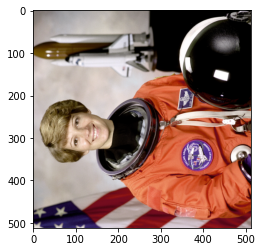

In [27]:
show(rotate(image))

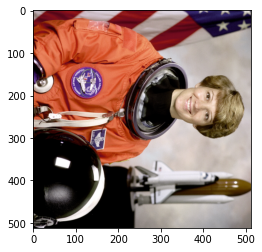

In [28]:
show(rotate(image, ccw=False))

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit.

In [ ]:
grader.export(pdf=False, force_save=True)